## <center>Trabalho de Técnicas de Programação I:</center>
### <center>Analisando os dados da base do Airbnb</center>

Equipe:

* Beatriz Porto;
* Eduardo Mattana;
* Michel Camargo;
* Pedro Lima;
* Rubens Souza.



A FAZER:
- Quantidade de reservas total por período;

- relação de preços das locações e do bairro;
- Existe alguma relação entre o preço e os reviews?

- Quais os bairros mais procurados para locação no RJ? Fazer média dos próximos trinta dias a partir da última planilha;

- Existem anuncios que não estão disponíveis para serem alugados pelo airbnb?

- Os hosts com maior número de locações representam um valor expressivo ou

JÁ TEMOS:
- Quais os bairros mais procurados para locação no RJ? Já temos o número de imóveis por bairro;
- Bairros com mais anuncios;
- quantidade de informações nulas em cada DF;
- Comparando o número de imóveis por bairro;
- Número de avaliações por bairro;
- Mudança no tipo de acomodação da cidade;



## 1. Entendendo o AirBnb.
Airbnb é um mercado online e empresa de corretagem de serviços de hospedagem com sede em São Francisco na Califórnia, Estados Unidos. Os usuários podem utilizar o serviço para organizar ou oferecer hospedagem, casas de família ou experiências turísticas.

O preço de reserva das propriedades varia de acordo com vários atributos como localização, tipo de propriedade, tamanho, número de quartos, comodidades, dia da semana e mês do ano, etc. O Airbnb disponibilizou publicamente seu conjunto de dados sobre listagens de propriedades no Rio de Janeiro em 28/06/2024. Nosso objetivo é estudar esse conjunto de dados para entender quais são as principais tendências e movimentações de setembro de 2023 até junho de 2024, mês do último conjunto de dados liberado pela plataforma.



## 2. Entendendo os Dados:


Importando as bibliotecas necessárias:


In [2]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.dates import MonthLocator, DateFormatter # type: ignore

Lendo os dados:


In [3]:
listings_completo = pd.read_csv("listings_completo.csv")
listings_22_09_23 = pd.read_csv('listings_22_09_23.csv')
listings_26_12_23 = pd.read_csv('listings_26_12_23.csv')
listings_29_03_24 = pd.read_csv('listings_29_03_24.csv')
listings_27_06_24 = pd.read_csv('listings_27_06_24.csv')

Entendendo os dados da tabela:

In [4]:
listings_completo.head(2)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20240627045056,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.88
1,25026,https://www.airbnb.com/rooms/25026,20240627045056,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.92,4.84,4.62,NaN,f,1,1,0,0,1.70


In [5]:
listings_27_06_24.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23,NaN
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,NaN,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1,NaN


In [6]:
# Colunas do arquivo completo:

listings_completo.columns
    

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
# Colunas do arquivo menor (todos os arquivos menores possuem as mesmas colunas):

listings_27_06_24.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## 3. Preparando os Dados:



3.1. Começando com o maior arquivo ('listings_completo'):

Removendo colunas que não trazem dados para serem analisados, como por exemplo, dados sobre se há fotos de perfil do host:

In [8]:
colunas = ['longitude',
         'latitude',
         'first_review',
         'last_review',
         'listing_url',
         'scrape_id',
         'last_scraped',
         'source',
         'name',
         'description',
         'neighborhood_overview',
         'picture_url',
         'host_location',
         'host_about',
         'host_response_time',
         'host_thumbnail_url',
         'host_picture_url',
         'host_has_profile_pic',
         'neighbourhood',
         'neighbourhood_group_cleansed',
         'bathrooms_text',
         'amenities',
         'calendar_updated',
         'calendar_last_scraped',
         'license',
         ]
listings_completo = listings_completo.drop(columns = colunas)
pd.set_option('display.max_columns', None)
listings_completo.head()

,id,host_id,host_url,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,100%,100%,t,Copacabana,2,5,"['email', 'phone']",t,Copacabana,Entire condo,Entire home/apt,5,1.0,2.0,2.0,$310.00,5,28,5,5,28,28,5.0,28.0,t,6,32,51,274,319,23,1,4.71,4.77,4.64,4.84,4.91,4.77,4.67,f,1,1,0,0,1.88
1,25026,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,100%,82%,t,Copacabana,1,5,"['email', 'phone']",t,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,$203.00,2,60,2,2,60,60,2.0,60.0,t,24,54,71,241,291,23,1,4.73,4.71,4.79,4.82,4.92,4.84,4.62,f,1,1,0,0,1.70
2,220377,1142424,https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,100%,47%,f,Tijuca,3,3,['phone'],t,Tijuca,Private room in rental unit,Private room,2,1.0,1.0,1.0,$220.00,1,365,1,1,1125,1125,1.0,1125.0,t,9,29,41,283,5,1,0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,f,3,0,3,0,0.03
3,35764,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,100%,98%,t,Copacabana,1,2,"['email', 'phone']",t,Copacabana,Entire loft,Entire home/apt,2,1.5,1.0,1.0,$201.00,3,15,3,4,15,15,3.0,15.0,t,5,10,24,93,476,36,5,4.91,4.94,4.92,4.97,4.95,4.94,4.89,f,1,1,0,0,2.85
4,223073,503995,https://www.airbnb.com/users/show/503995,❤️ BrUx ❤️,2011-04-12,100%,100%,t,Ipanema,7,8,"['email', 'phone']",t,Ipanema,Entire loft,Entire home/apt,2,1.0,1.0,1.0,$321.00,1,730,5,9,1125,1125,5.4,1125.0,t,13,43,73,348,471,17,1,4.81,4.83,4.74,4.95,4.98,4.97,4.73,t,7,7,0,0,3.04


Podemos notar que o preço atribuído deveria ter valores numéricos mas o data type é um objeto por usar o sinal '$'. Então precisamos converter essa coluna para um tipo numérico:

In [9]:
listings_completo["price"].head()

0    $310.00
1    $203.00
2    $220.00
3    $201.00
4    $321.00
Name: price, dtype: object

In [10]:
listings_completo['price'] = listings_completo['price'].replace(r'[\$,]', '', regex=True).astype(float)
listings_completo['price'].head()

0    310.0
1    203.0
2    220.0
3    201.0
4    321.0
Name: price, dtype: float64

Transformando os valores da data que também estão como object:

In [11]:
listings_completo["host_since"] = pd.to_datetime(listings_completo["host_since"], format="%Y-%m-%d")


In [12]:
listings_completo['host_since'].head()

0   2010-01-08
1   2010-04-03
2   2011-09-11
3   2010-06-27
4   2011-04-12
Name: host_since, dtype: datetime64[ns]

Podemos notar que há valores fora do comum entre os maiores preços. Se abrirmos o url do valor mais alto, por exemplo, vamos notar que o host está utilizando o site do Airbnb apenas para locar por fora da plataforma e assim criando dados que não são reais para serem analisados:


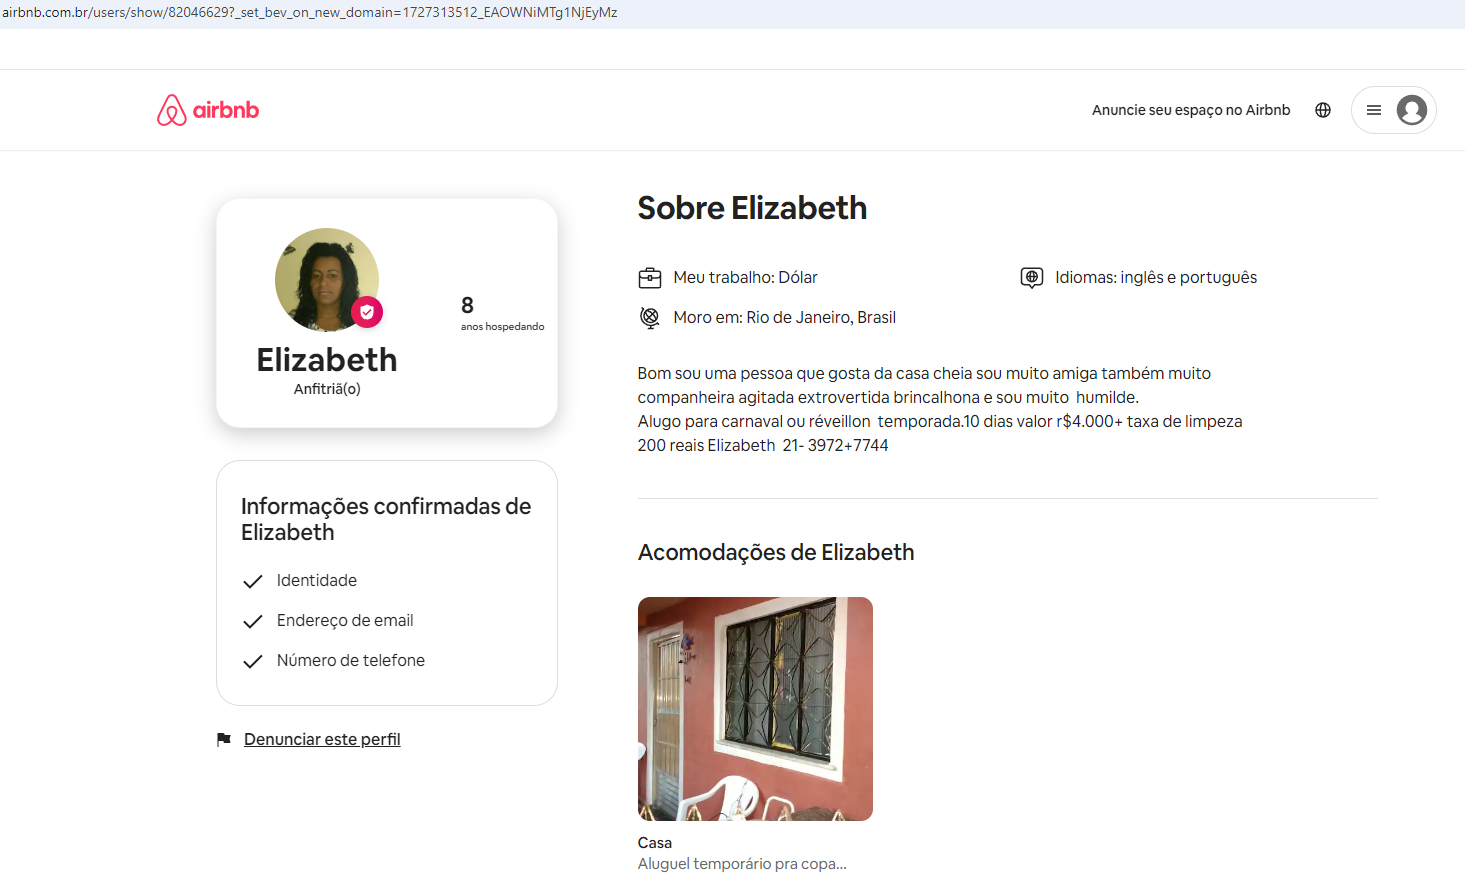

Para excluir esses casos da analise, vamos apagar as linhas em que não há reviews e em que não há nenhuma reserva em 365 dias, além de tirar as linhas em que não há valores de reserva:


In [13]:
''' apaga as linhas em que não tem review e que está disponível nos próximos 365 dias
    fica com o inverso das descritas'''

essas_ficam = ~((listings_completo['reviews_per_month'].isna()) & (listings_completo['availability_365'] == 365) & (listings_completo['price'].notna()))
listings_completo = listings_completo[essas_ficam]
listings_completo.head()

,id,host_id,host_url,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,100%,100%,t,Copacabana,2,5,"['email', 'phone']",t,Copacabana,Entire condo,Entire home/apt,5,1.0,2.0,2.0,310.0,5,28,5,5,28,28,5.0,28.0,t,6,32,51,274,319,23,1,4.71,4.77,4.64,4.84,4.91,4.77,4.67,f,1,1,0,0,1.88
1,25026,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,100%,82%,t,Copacabana,1,5,"['email', 'phone']",t,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,203.0,2,60,2,2,60,60,2.0,60.0,t,24,54,71,241,291,23,1,4.73,4.71,4.79,4.82,4.92,4.84,4.62,f,1,1,0,0,1.70
2,220377,1142424,https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,100%,47%,f,Tijuca,3,3,['phone'],t,Tijuca,Private room in rental unit,Private room,2,1.0,1.0,1.0,220.0,1,365,1,1,1125,1125,1.0,1125.0,t,9,29,41,283,5,1,0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,f,3,0,3,0,0.03
3,35764,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,100%,98%,t,Copacabana,1,2,"['email', 'phone']",t,Copacabana,Entire loft,Entire home/apt,2,1.5,1.0,1.0,201.0,3,15,3,4,15,15,3.0,15.0,t,5,10,24,93,476,36,5,4.91,4.94,4.92,4.97,4.95,4.94,4.89,f,1,1,0,0,2.85
4,223073,503995,https://www.airbnb.com/users/show/503995,❤️ BrUx ❤️,2011-04-12,100%,100%,t,Ipanema,7,8,"['email', 'phone']",t,Ipanema,Entire loft,Entire home/apt,2,1.0,1.0,1.0,321.0,1,730,5,9,1125,1125,5.4,1125.0,t,13,43,73,348,471,17,1,4.81,4.83,4.74,4.95,4.98,4.97,4.73,t,7,7,0,0,3.04


3.2. Preparo dos arquivos de 22/09/23 a 27/06/24:

Quantas informações estão nulas em cada arquivo?\
Alguns dos dados não foram preenchidos em nenhumas das tabelas e não constam no [dicionário de dados](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596) do próprio Airbnb.

In [14]:
arq_nulos = listings_27_06_24.isnull().sum()
arq_nulos2 = listings_29_03_24.isnull().sum()
arq_nulos_compara = pd.concat([arq_nulos2, arq_nulos], axis=1)
arq_nulos_compara.rename(columns={1:'nulos_no_df_27_06_24', 0:'nulos_no_df_29_03_24'}, inplace=True)
arq_nulos3 = listings_26_12_23.isnull().sum()
arq_nulos4 = listings_22_09_23.isnull().sum()
arq_nulos_compara2 = pd.concat([arq_nulos4, arq_nulos3], axis=1)
arq_nulos_compara2.rename(columns={1:'nulos_no_df_26_12_23', 0:'nulos_no_df_22_09_23'}, inplace=True)
nulos_final = pd.concat([arq_nulos_compara2, arq_nulos_compara], axis=1)
nulos_final



,nulos_no_df_22_09_23,nulos_no_df_26_12_23,nulos_no_df_29_03_24,nulos_no_df_27_06_24
id,0,0,0,0
name,0,0,0,0
host_id,0,0,0,0
host_name,3,9,3,0
neighbourhood_group,31964,36008,38029,34664
neighbourhood,0,0,0,0
latitude,0,0,0,0
longitude,0,0,0,0
room_type,0,0,0,0
price,0,1771,4095,972


In [15]:
print('Tamanho do DF do dia 22/09/23: ', listings_22_09_23.shape)
print('Tamanho do DF do dia 26/12/23: ', listings_26_12_23.shape)
print('Tamanho do DF do dia 29/03/24: ', listings_29_03_24.shape)
print('Tamanho do DF do dia 27/06/24: ', listings_27_06_24.shape)

Tamanho do DF do dia 22/09/23:  (31964, 18)
Tamanho do DF do dia 26/12/23:  (36008, 18)
Tamanho do DF do dia 29/03/24:  (38029, 18)
Tamanho do DF do dia 27/06/24:  (34664, 18)


In [16]:
listings_27_06_24.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Vamos retirar as colunas que não serão utilizadas nas análises:

In [17]:
listings_22_09_23.drop(columns = ['longitude','latitude','neighbourhood_group','license'], inplace=True)
listings_26_12_23.drop(columns = ['longitude','latitude','neighbourhood_group','license'], inplace=True)
listings_29_03_24.drop(columns = ['longitude','latitude','neighbourhood_group','license'], inplace=True)
listings_27_06_24.drop(columns = ['longitude','latitude','neighbourhood_group','license'], inplace=True)

## 4. Questões analíticas e respostas:

Qual é a proporção de disponibilidade de tipos de quartos?

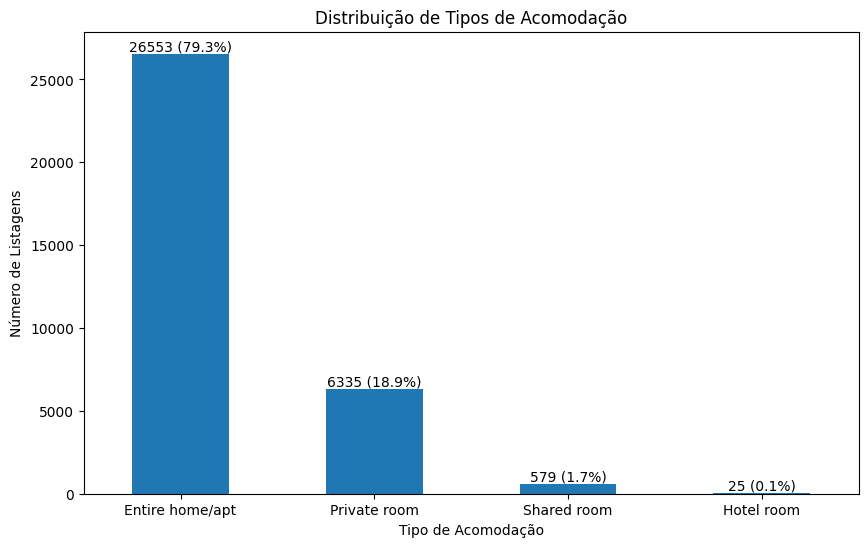

In [18]:
'''mostra a proporção entre os tipos de quartos'''

room_typeColunas = listings_completo['room_type'].value_counts().reset_index()
room_typeColunas.columns = ['room_type', 'count']
room_typeColunas['percentage'] = (room_typeColunas['count'] / room_typeColunas['count'].sum()) * 100


room_typeColunas['label'] = room_typeColunas.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

ax = room_typeColunas.plot(x='room_type', y='count', kind='bar', figsize=(10, 6))


for i, v in enumerate(room_typeColunas['count']):
    ax.text(i, v, room_typeColunas['label'][i], ha='center', va='bottom')


ax.set_title('Distribuição de Tipos de Acomodação')
ax.set_xlabel('Tipo de Acomodação')
ax.set_ylabel('Número de Listagens')
ax.set_xticklabels(room_typeColunas['room_type'], rotation=0)
ax.get_legend().remove()

Como essa distribuição variou de setembro de 2023 a junho de 2024?

In [19]:
acomodacoes = pd.pivot_table(listings_27_06_24, index='room_type', values='id', aggfunc='count').sort_values(by='id',ascending=False)
acomodacoes2 = pd.pivot_table(listings_29_03_24, index='room_type', values='id', aggfunc='count').sort_values(by='id',ascending=False)
acomodacoes3 = pd.pivot_table(listings_26_12_23, index='room_type', values='id', aggfunc='count').sort_values(by='id',ascending=False)
acomodacoes4 = pd.pivot_table(listings_22_09_23, index='room_type', values='id', aggfunc='count').sort_values(by='id',ascending=False)
acomodacoes_mudanca = pd.merge(left=acomodacoes, right=acomodacoes2, how='outer', on='room_type')
acomodacoes_mudanca.rename(columns={'id_x': 'acomodacoes_29_03_24', 'id_y': 'acomodacoes_27_06_24'}, inplace=True)
acomodacoes_mudanca2 = pd.merge(left=acomodacoes4, right=acomodacoes3, how='outer', on='room_type')
acomodacoes_mudanca2.rename(columns={'id_x': 'acomodacoes_22_09_23', 'id_y': 'acomodacoes_26_12_23'}, inplace=True)
acomodacoes_mudanca_final = pd.concat([acomodacoes_mudanca2, acomodacoes_mudanca], axis=1)
acomodacoes_mudanca_final

,acomodacoes_22_09_23,acomodacoes_26_12_23,acomodacoes_29_03_24,acomodacoes_27_06_24
room_type,,,,
Entire home/apt,24858,28468,27383,29989
Hotel room,47,38,25,32
Private room,6484,6910,6643,7345
Shared room,575,592,613,663


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

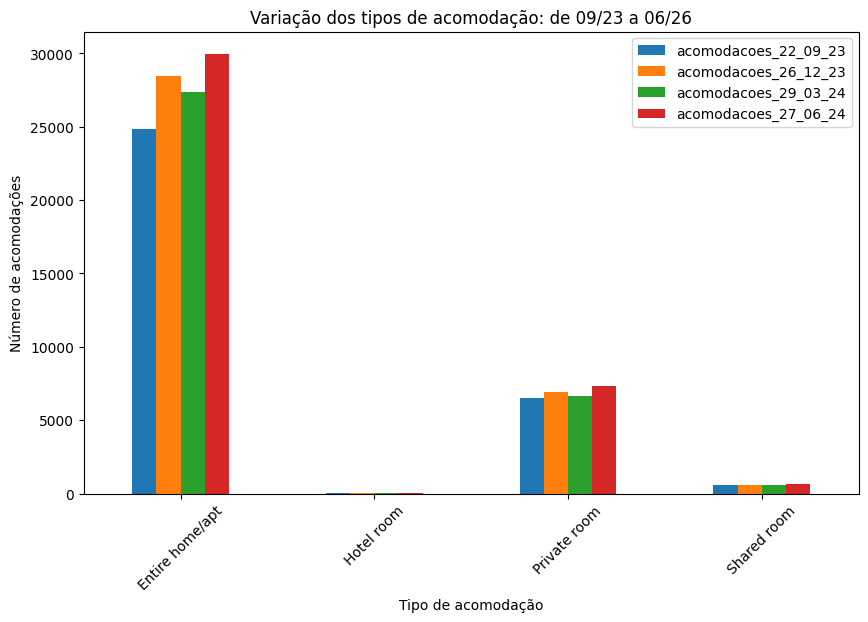

In [20]:
acomodacoes_mudanca_final.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Tipo de acomodação")
plt.ylabel('Número de acomodações')
plt.title('Variação dos tipos de acomodação: de 09/23 a 06/26')
plt.xticks(rotation = 45)

Qual é a tendencia de novos hosts durante o ano de 2024?

In [21]:
hosts_2024 = listings_completo[listings_completo['host_since'].dt.year == 2024]
len(hosts_2024)

1082

Janeiro: 295
Fevereiro: 217
Março: 170
Abril: 200
Maio: 147
Junho: 53


1082

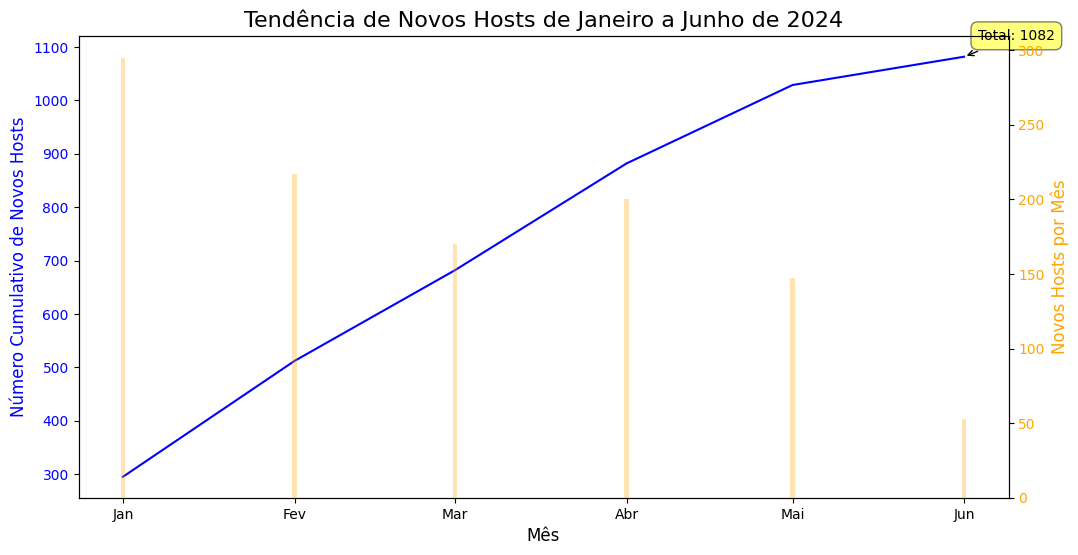

In [22]:
meses_pt = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai', 6: 'Jun'
}
meses_pt_completo = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho'
}

hosts_2024 = listings_completo[(listings_completo['host_since'].dt.year == 2024) &
                               (listings_completo['host_since'].dt.month <= 6)]

hosts_por_mes = hosts_2024.groupby(hosts_2024['host_since'].dt.to_period('M')).size()

todos_meses = pd.period_range(start='2024-01', end='2024-06', freq='M')
hosts_por_mes = hosts_por_mes.reindex(todos_meses, fill_value=0)

hosts_cumulativo = hosts_por_mes.cumsum()

fig, eixo1 = plt.subplots(figsize=(12, 6))


eixo1.grid(False)
cor_linha = 'blue'
eixo1.set_xlabel('Mês', fontsize=12)
eixo1.set_ylabel('Número Cumulativo de Novos Hosts', color=cor_linha, fontsize=12)
eixo1.plot(hosts_cumulativo.index.to_timestamp(), hosts_cumulativo.values, color=cor_linha)
eixo1.tick_params(axis='y', labelcolor=cor_linha)

eixo2 = eixo1.twinx()
cor_barra = 'orange'
eixo2.set_ylabel('Novos Hosts por Mês', color=cor_barra, fontsize=12)
eixo2.bar(hosts_por_mes.index.to_timestamp(), hosts_por_mes.values, color=cor_barra, alpha=0.3)
eixo2.tick_params(axis='y', labelcolor=cor_barra)

eixo2.grid(False)


plt.title('Tendência de Novos Hosts de Janeiro a Junho de 2024', fontsize=16)


eixo1.xaxis.set_major_locator(MonthLocator())
eixo1.xaxis.set_major_formatter(DateFormatter('%m'))


ticks = eixo1.get_xticks()
labels = eixo1.get_xticklabels()


novos_rotulos = [meses_pt[int(label.get_text())] if label.get_text().isdigit() and int(label.get_text()) <= 6 else '' for label in labels]


eixo1.set_xticks(ticks)
eixo1.set_xticklabels(novos_rotulos)


total_hosts = hosts_cumulativo.iloc[-1]
eixo1.annotate(f'Total: {total_hosts}',
               xy=(hosts_cumulativo.index[-1].to_timestamp(), total_hosts),
               xytext=(10, 10), textcoords='offset points',
               ha='left', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
               arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))



for mes, contagem in hosts_por_mes.items():
    print(f"{meses_pt_completo[mes.month]}: {contagem}")
total_hosts

Quais bairros tem mais procura por usuários do Airbnb?

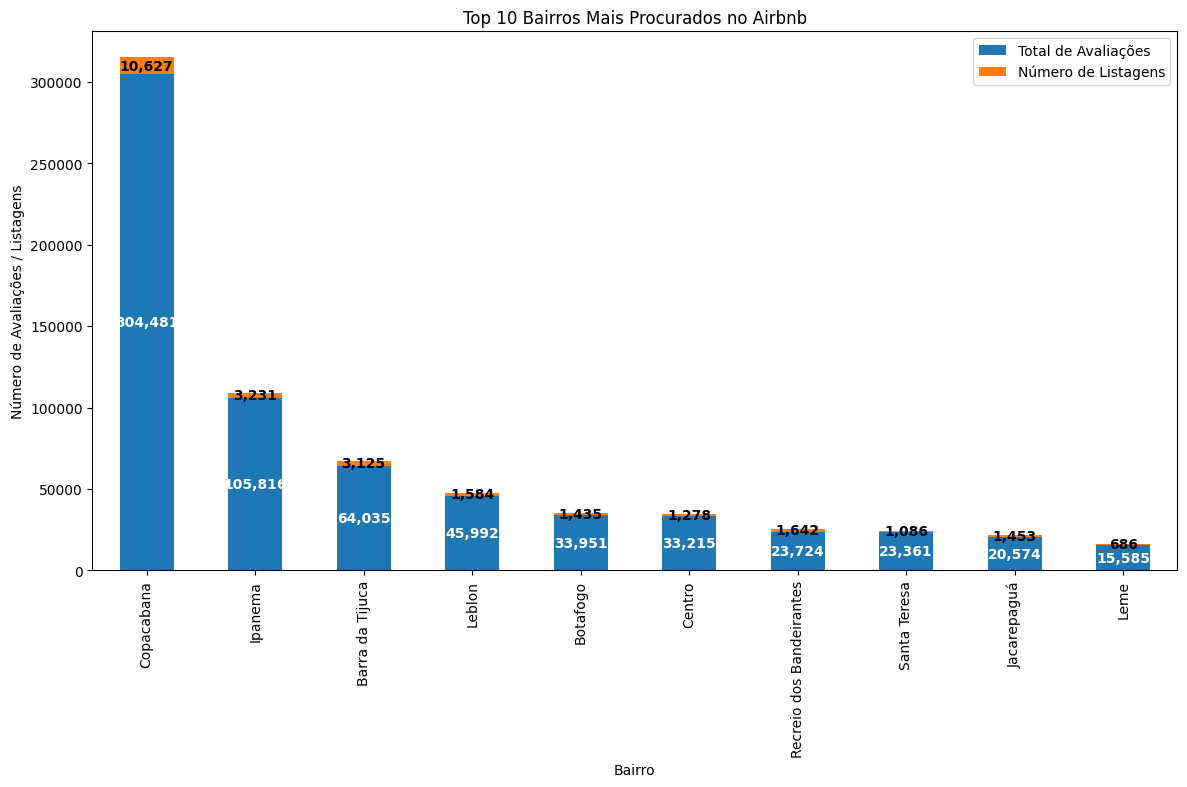

In [23]:
bairros_stats = listings_completo.groupby('neighbourhood_cleansed').agg({
    'number_of_reviews': 'sum',
    'id': 'count'
}).sort_values('number_of_reviews', ascending=False)


bairros_stats.columns = ['Total de Avaliações', 'Número de Listagens']

top_10_bairros = bairros_stats.head(10)


fig, ax = plt.subplots(figsize=(14, 7))

top_10_bairros.plot(kind='bar', stacked=True, ax=ax)

plt.title('Top 10 Bairros Mais Procurados no Airbnb')
plt.xlabel('Bairro')
plt.ylabel('Número de Avaliações / Listagens')

for i, (index, row) in enumerate(top_10_bairros.iterrows()):
    plt.text(i, row['Total de Avaliações']/2, f'{row["Total de Avaliações"]:,}',
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, row['Total de Avaliações'] + row['Número de Listagens']/2, f'{row["Número de Listagens"]:,}',
             ha='center', va='center', color='black', fontweight='bold')

ax.grid(False)

Qual é a média de preços dos alugueis? Existe uma diferença de preço entre os bairros?

                          Preço Médio  Número de Listagens
neighbourhood_cleansed                                    
Barra da Tijuca            908.060007                 3033
Leblon                     887.802863                 1537
Ipanema                    808.178594                 3158
Leme                       613.964232                  671
Recreio dos Bandeirantes   574.502491                 1606
Jacarepaguá                530.403433                 1398
Copacabana                 506.239416                10346
Botafogo                   444.474638                 1380
Santa Teresa               407.226891                 1071
Flamengo                   387.830040                  759


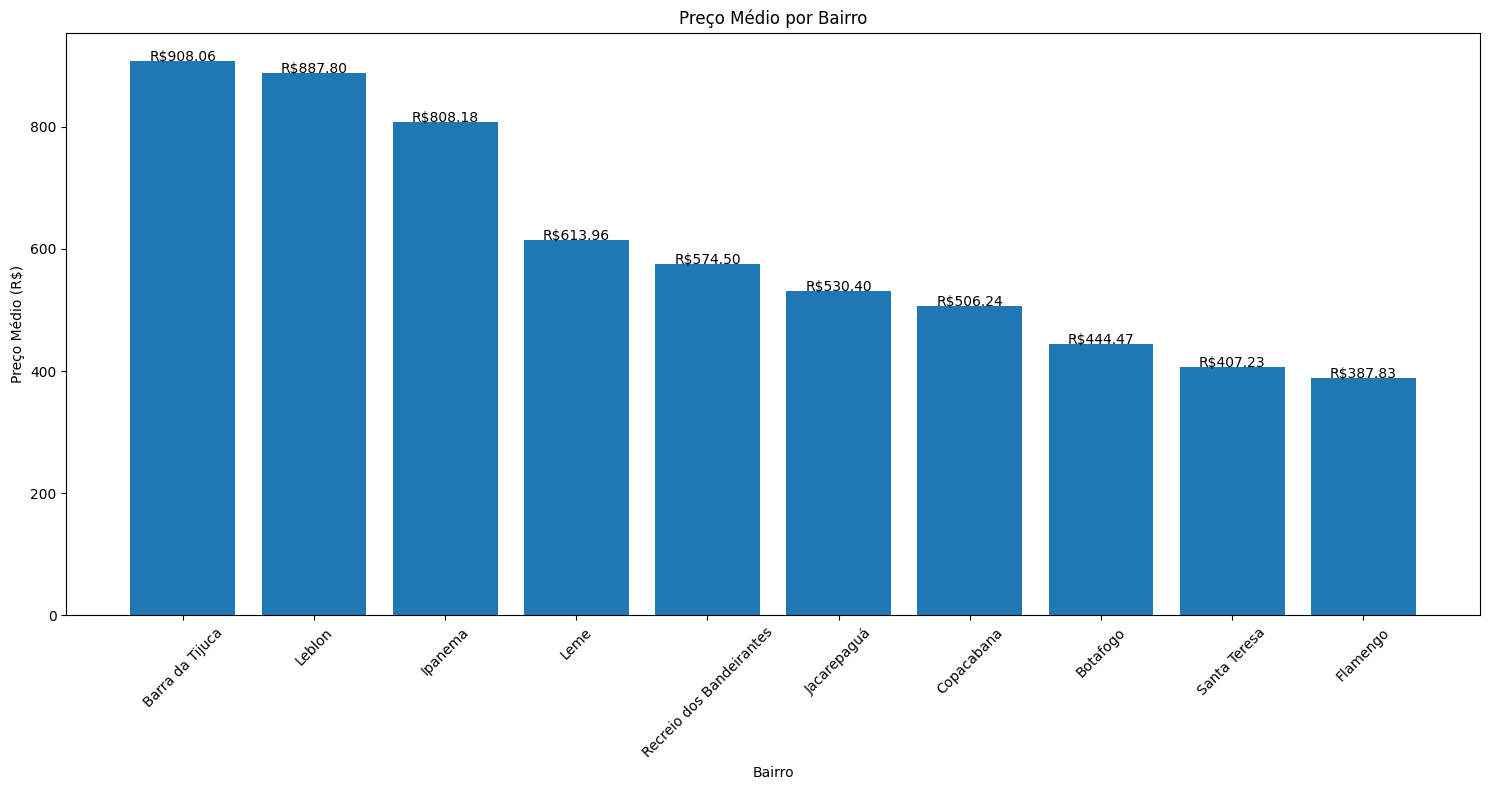

In [28]:
'''Definir um mínimo de imóveis por bairro para entrar na conta'''
limite_listagens = 500


precos_por_bairro = listings_completo.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'count'])
precos_por_bairro = precos_por_bairro[precos_por_bairro['count'] >= limite_listagens]


precos_por_bairro = precos_por_bairro.sort_values('mean', ascending=False)
precos_por_bairro.columns = ['Preço Médio', 'Número de Listagens']


print(precos_por_bairro.head(10))

top_10_bairros = precos_por_bairro.head(10)
plt.figure(figsize=(15, 8))
plt.bar(top_10_bairros.index, top_10_bairros['Preço Médio'])
plt.title('Preço Médio por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(top_10_bairros['Preço Médio']):
    plt.text(i, v, f'R${v:.2f}', ha='center')


Os hosts com maior número de locações representam um valor expressivo?


Quais os dez bairros com o maior número de imóveis?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Copacabana'),
  Text(1, 0, 'Barra da Tijuca'),
  Text(2, 0, 'Ipanema'),
  Text(3, 0, 'Recreio dos Bandeirantes'),
  Text(4, 0, 'Jacarepaguá'),
  Text(5, 0, 'Leblon'),
  Text(6, 0, 'Botafogo'),
  Text(7, 0, 'Santa Teresa'),
  Text(8, 0, 'Centro'),
  Text(9, 0, 'Flamengo')])

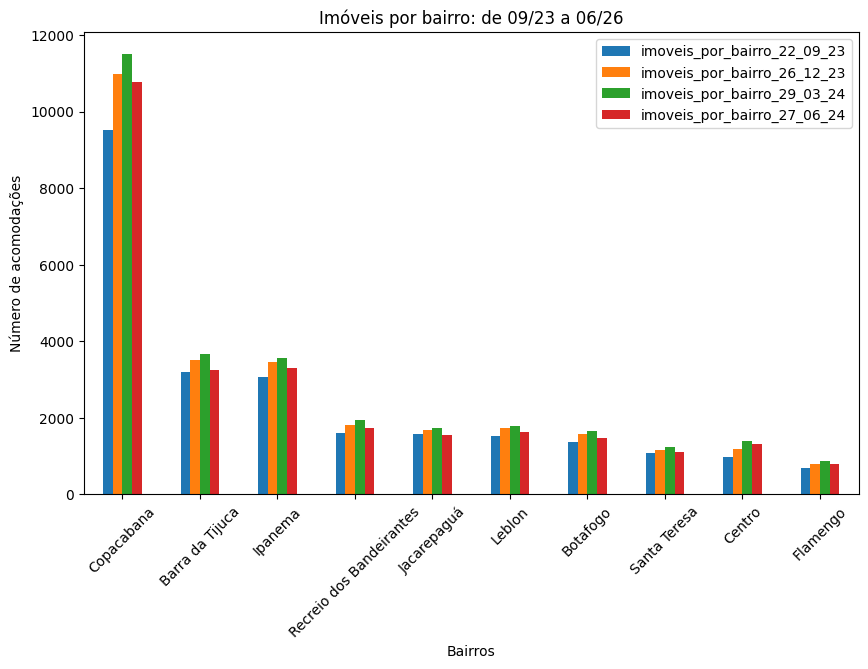

In [25]:
# Agrupar por bairro

arq_group_bairro3 = listings_26_12_23.groupby('neighbourhood').count()
arq_group_bairro4 = listings_22_09_23.groupby('neighbourhood').count()
arq_group_bairro2 = listings_29_03_24.groupby('neighbourhood').count()
arq_group_bairro = listings_27_06_24.groupby('neighbourhood').count()

# Podemos verificar que os bairros não mudaram, apenas os números dentro deles, então, vamos criar o DF:

arq_por_bairro3 = pd.pivot_table(listings_26_12_23, index='neighbourhood', values='id', aggfunc='count').sort_values(by= 'id', ascending=False)
arq_por_bairro4 = pd.pivot_table(listings_22_09_23, index='neighbourhood', values='id', aggfunc='count').sort_values(by= 'id', ascending=False)
arq_por_bairro2 = pd.pivot_table(listings_29_03_24, index='neighbourhood', values='id', aggfunc='count').sort_values(by= 'id', ascending=False)
arq_por_bairro = pd.pivot_table(listings_27_06_24, index='neighbourhood', values='id', aggfunc='count').sort_values(by= 'id', ascending=False)

compara_imovel = pd.merge(left=arq_por_bairro2, right=arq_por_bairro, how='outer', right_on='neighbourhood', left_on='neighbourhood').sort_values(by=['id_x','id_y'], ascending=False)
compara_imovel.rename(columns={'id_x':"imoveis_por_bairro_29_03_24", 'id_y' : "imoveis_por_bairro_27_06_24" }, inplace=True)
compara_imovel2 = pd.merge(left=arq_por_bairro4, right=arq_por_bairro3, how='outer', right_on='neighbourhood', left_on='neighbourhood').sort_values(by=['id_x','id_y'], ascending=False)
compara_imovel2.rename(columns={'id_x':"imoveis_por_bairro_22_09_23", 'id_y' : "imoveis_por_bairro_26_12_23" }, inplace=True)
compara_imovel_final = pd.concat([compara_imovel2, compara_imovel], axis=1)

# Criando um gráfico de barras:

compara_imovel_final.head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel("Bairros")
plt.ylabel('Número de acomodações')
plt.title('Imóveis por bairro: de 09/23 a 06/26')
plt.xticks(rotation = 45)


Quais os dez bairros com o maior número de avaliações?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Barra da Tijuca'),
  Text(1, 0, 'Botafogo'),
  Text(2, 0, 'Centro'),
  Text(3, 0, 'Copacabana'),
  Text(4, 0, 'Flamengo'),
  Text(5, 0, 'Ipanema'),
  Text(6, 0, 'Jacarepaguá'),
  Text(7, 0, 'Leblon'),
  Text(8, 0, 'Recreio dos Bandeirantes'),
  Text(9, 0, 'Santa Teresa')])

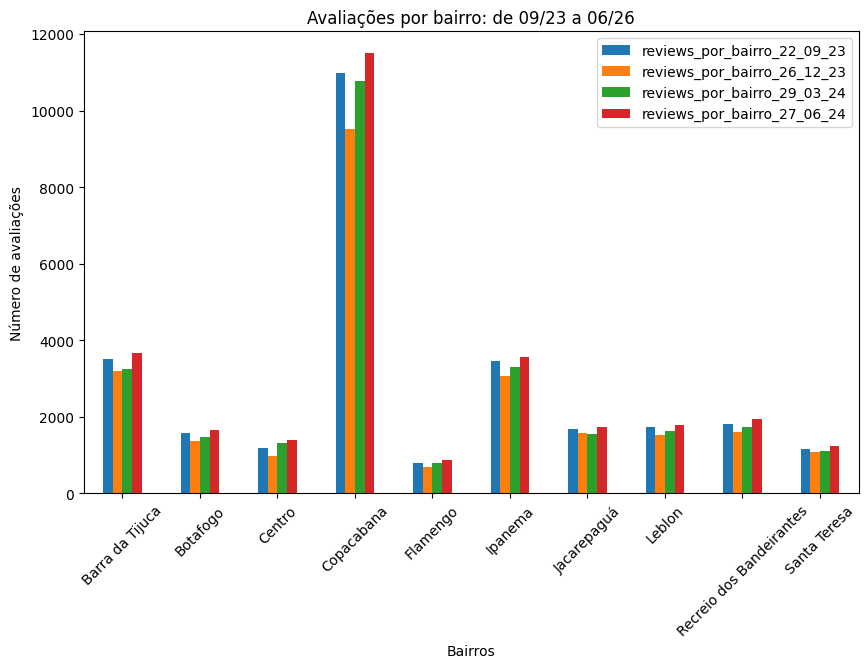

In [26]:
# Agrupando por número de reviews:

arq_group_bairro4['number_of_reviews'].sort_values(ascending=False).head(10)
arq_group_bairro3['number_of_reviews'].sort_values(ascending=False).head(10)
arq_group_bairro2['number_of_reviews'].sort_values(ascending=False).head(10)
arq_group_bairro['number_of_reviews'].sort_values(ascending=False).head(10)

# Construindo os data frames para uní-los, após verificar que os dez bairros não mudaram no decorrer dos meses:

df2_avaliacao = arq_group_bairro2['number_of_reviews'].sort_values(ascending=False).head(10)
df1_avaliacao = arq_group_bairro['number_of_reviews'].sort_values(ascending=False).head(10)
avaliacao_por_bairro = pd.merge(left=df1_avaliacao, right=df2_avaliacao, how='outer', right_on='neighbourhood', left_on='neighbourhood')
avaliacao_por_bairro.rename(columns={'number_of_reviews_x':"reviews_por_bairro_29_03_24", 'number_of_reviews_y' : "reviews_por_bairro_27_06_24" }, inplace=True)
df4_avaliacao = arq_group_bairro4['number_of_reviews'].sort_values(ascending=False).head(10)
df3_avaliacao = arq_group_bairro3['number_of_reviews'].sort_values(ascending=False).head(10)
avaliacao_por_bairro2 = pd.merge(left=df3_avaliacao, right=df4_avaliacao, how='outer', right_on='neighbourhood', left_on='neighbourhood')
avaliacao_por_bairro2.rename(columns={'number_of_reviews_x':"reviews_por_bairro_22_09_23", 'number_of_reviews_y' : "reviews_por_bairro_26_12_23" }, inplace=True)
avaliacao_por_bairro_final = pd.concat([avaliacao_por_bairro2, avaliacao_por_bairro], axis=1)

# Construindo o gráfico de barras:

avaliacao_por_bairro_final.head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel("Bairros")
plt.ylabel('Número de avaliações')
plt.title('Avaliações por bairro: de 09/23 a 06/26')
plt.xticks(rotation = 45)